<a href="https://colab.research.google.com/github/ADARSH010203/Gold_prediction/blob/main/Gold_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [ ]:
a = pd.read_csv('Gold Price Prediction.csv')
a

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
0,8/7/24,2405.87,2384.90,2385.83,NaN,NaN,NaN,30.155078,2414.7450,2368.2948,...,3.0,5.33,96,5.50,4.00,3.96,103.37,5293.13,24.77,72.84
1,8/6/24,2442.74,2405.87,2384.90,2385.83,0.93,NaN,29.423936,2414.1525,2367.7916,...,3.0,5.33,89,5.50,3.99,3.90,102.78,5206.42,33.71,73.86
2,8/5/24,2447.17,2442.74,2405.87,2384.90,-20.97,NaN,28.341301,2413.2305,2367.1584,...,3.0,5.33,86,5.52,3.89,3.78,103.22,5151.14,23.39,74.21
3,8/2/24,2447.23,2447.17,2442.74,2405.87,-36.87,NaN,28.616661,2411.0920,2365.7250,...,3.0,5.33,89,5.54,3.88,3.80,104.31,5376.63,20.52,76.87
4,8/1/24,2411.09,2447.23,2447.17,2442.74,-4.43,NaN,26.084796,2408.5670,2363.5624,...,3.0,5.33,83,5.55,4.16,3.99,104.07,5537.84,16.20,78.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,1/7/22,1810.28,1791.61,1796.41,1801.52,5.11,38.17,NaN,450.8225,180.3290,...,7.5,0.10,71,0.05,0.87,1.76,96.26,4697.66,19.85,79.62
672,1/6/22,1813.88,1810.28,1791.61,1796.41,4.80,47.40,NaN,361.0020,144.4008,...,7.5,0.10,73,0.04,0.88,1.73,96.20,4693.39,20.29,77.24
673,1/5/22,1804.27,1813.88,1810.28,1791.61,-18.67,28.30,NaN,271.4215,108.5686,...,7.5,0.10,74,0.05,0.83,1.71,96.31,4787.99,17.07,77.18
674,1/4/22,1815.73,1804.27,1813.88,1810.28,-3.60,0.45,NaN,180.9075,72.3630,...,7.5,0.10,74,0.06,0.77,1.66,96.19,4804.51,16.57,76.02


##Exploratory Data Analysis."




In [ ]:
a['Rolling Mean'].fillna(a['Rolling Mean'].mean(),inplace=True)

In [ ]:
a['Rolling Std'].fillna(a['Rolling Std'].mean(),inplace=True)

In [ ]:
a.isnull().sum()

,0
Date,0
Price 2 Days Prior,0
Price 1 Day Prior,0
Price Today,0
Price Tomorrow,0
Price Change Tomorrow,0
Price Change Ten,0
Std Dev 10,0
Twenty Moving Average,0
Fifty Day Moving Average,0


"Find the null values in the 'prince change pen' column and fill those null values with the mean value of that column.

In [ ]:
b = a["Price Change Ten"].mean()
b

8.944414414414416

In [ ]:
a["Price Change Ten"].fillna(b,inplace=True)
a["Price Change Ten"].describe()

,Price Change Ten
count,676.000000
mean,8.944414
std,55.267939
min,-124.290000
25%,-28.420000
50%,3.395000
75%,42.065000
max,186.170000


In [ ]:
a["Std Dev 10"].fillna(a["Std Dev 10"].mean(),inplace = True)
a["Std Dev 10"].head()

,Std Dev 10
0,30.155078
1,29.423936
2,28.341301
3,28.616661
4,26.084796


In [ ]:
a["Price Tomorrow"].fillna(a[["Price 2 Days Prior","Price 1 Day Prior","Price Today"]].mean(axis=1),inplace=True)
c = a["Price Tomorrow"]-a["Price Today"]

a["Price Change Tomorrow"]=c
a.isnull().sum()

,0
Date,0
Price 2 Days Prior,0
Price 1 Day Prior,0
Price Today,0
Price Tomorrow,0
Price Change Tomorrow,0
Price Change Ten,0
Std Dev 10,0
Twenty Moving Average,0
Fifty Day Moving Average,0


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    676 non-null    object 
 1   Price 2 Days Prior                      676 non-null    float64
 2   Price 1 Day Prior                       676 non-null    float64
 3   Price Today                             676 non-null    float64
 4   Price Tomorrow                          676 non-null    float64
 5   Price Change Tomorrow                   676 non-null    float64
 6   Price Change Ten                        676 non-null    float64
 7   Std Dev 10                              676 non-null    float64
 8   Twenty Moving Average                   676 non-null    float64
 9   Fifty Day Moving Average                676 non-null    float64
 10  200 Day Moving Average                  676 non-null    float6

In [ ]:
a.describe()

,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,200 Day Moving Average,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,1956.236228,1957.114305,1957.937944,1958.807663,0.869719,8.944414,20.995813,1924.073017,1871.380976,1622.592107,5.410355,3.680621,94.670118,3.892293,3.977944,3.648092,103.845251,4419.902308,19.881361,84.382929
std,192.959980,193.560530,194.198338,194.824630,17.520062,55.267939,10.400708,265.468530,345.304237,540.444267,2.248175,2.000887,15.576974,1.996601,1.074036,0.766838,3.444444,499.216045,6.054484,11.856576
min,1627.040000,1627.040000,1627.040000,1627.040000,-81.890000,-124.290000,5.587177,90.213500,36.085400,9.021350,3.000000,0.080000,41.000000,0.020000,0.770000,1.630000,94.870000,3520.370000,11.530000,66.620000
25%,1823.587500,1824.490000,1824.490000,1824.970000,-9.090000,-28.420000,13.699522,1827.777875,1798.103600,1567.168475,3.200000,2.330000,83.000000,2.367500,3.400000,3.267500,102.297500,4025.432500,14.235000,76.555000
50%,1930.910000,1931.405000,1931.515000,1931.775000,0.710000,3.395000,18.364603,1927.932750,1919.624800,1814.988850,4.900000,4.830000,95.000000,4.700000,4.360000,3.810000,103.990000,4343.605000,19.070000,81.025000
75%,2021.452500,2022.290000,2023.977500,2024.327500,10.855000,42.065000,25.651078,2010.718500,1993.311900,1954.031825,7.900000,5.330000,104.000000,5.510000,4.730000,4.230000,105.390000,4715.932500,24.050000,88.765000
max,2469.650000,2469.650000,2469.650000,2469.650000,66.660000,186.170000,62.183588,2414.745000,2368.294800,2189.807800,9.100000,5.330000,144.000000,6.020000,5.190000,4.980000,114.190000,5644.090000,37.500000,124.660000


# ***EDA***

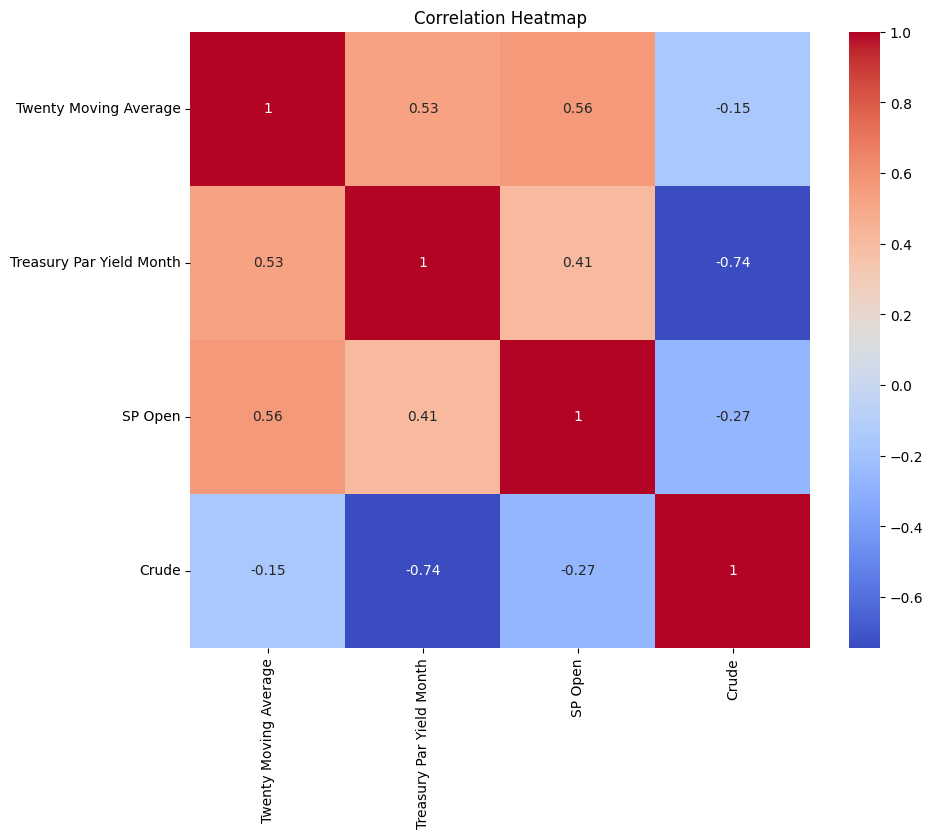

In [ ]:
corr_columns = ['Twenty Moving Average', 'Treasury Par Yield Month', 'SP Open', 'Crude']
df_corr = a[corr_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#2 Time Series Decomposition

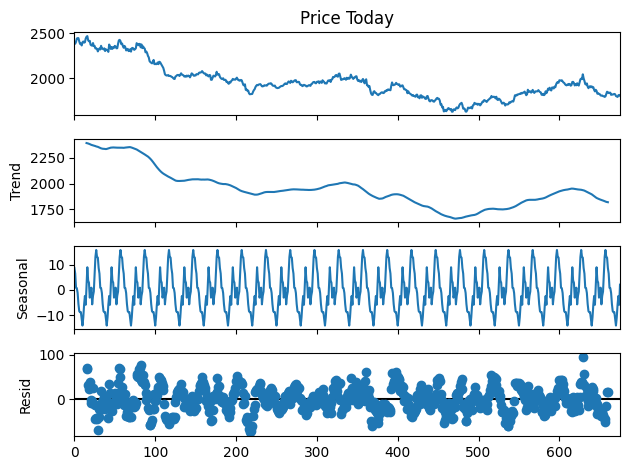

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
DecomposeResult = seasonal_decompose(a["Price Today"],model="additive",period=30)
DecomposeResult.plot()
plt.show()

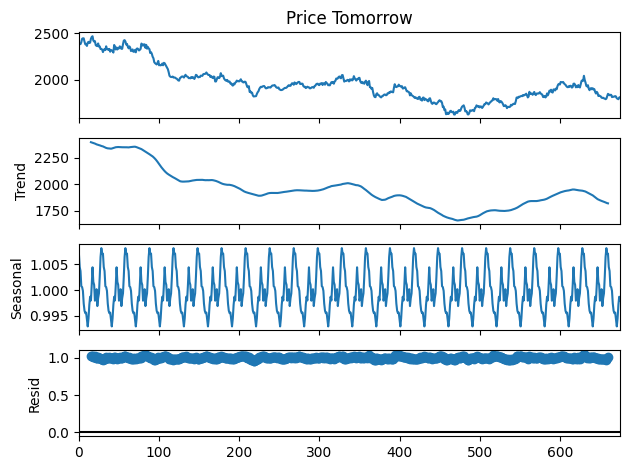

In [ ]:
#Time Series Decompostion in Price tomorrow
dea = seasonal_decompose(a['Price Tomorrow'],model="multiplicative",period=30)
dea.plot()
plt.show()

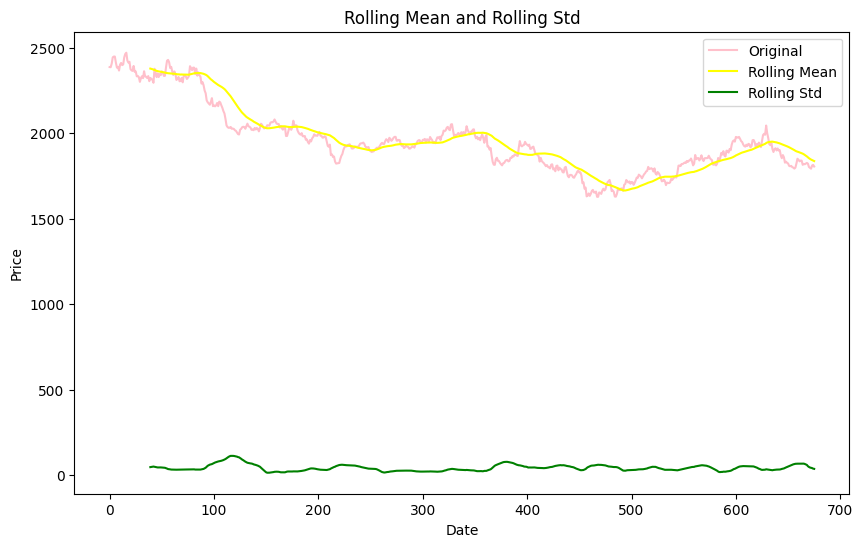

In [ ]:
a['Rolling Mean'] = a['Price Today'].rolling(window=40).mean()
a['Rolling Std'] = a['Price Today'].rolling(window=40).std()

plt.figure(figsize=(10, 6))
plt.plot(a['Price Today'], label='Original',color='pink')
plt.plot(a['Rolling Mean'], label='Rolling Mean',color='yellow')
plt.plot(a['Rolling Std'], label='Rolling Std',color='green')
plt.title('Rolling Mean and Rolling Std')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

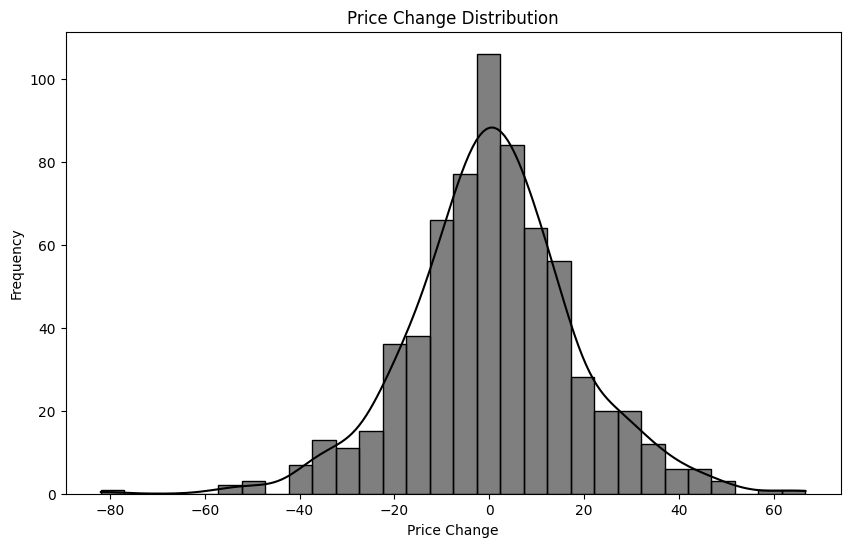

In [ ]:
#Price Change
a['Price Change'] = a['Price Today']-a['Price 1 Day Prior']
plt.figure(figsize=(10, 6))
sns.histplot(a['Price Change'],bins=30,kde=True,color='black')
plt.title('Price Change Distribution')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.show()

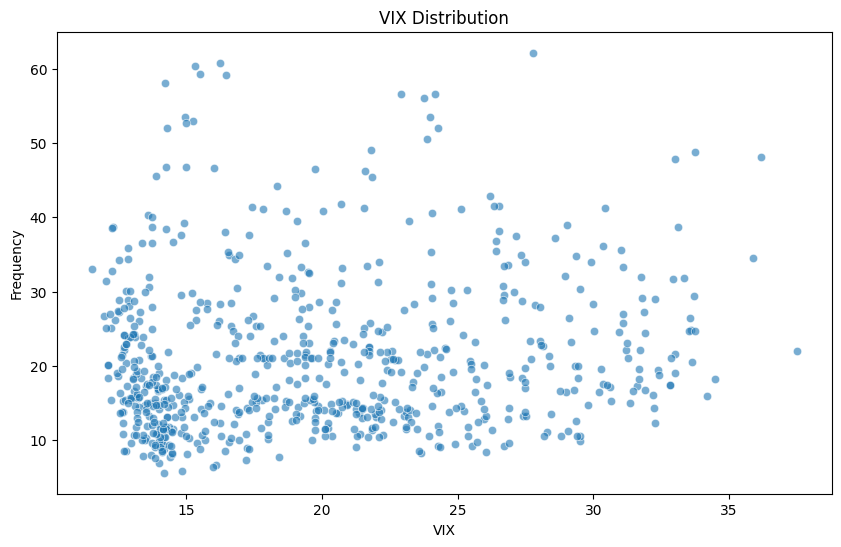

In [ ]:
#Volatitility vc VIX
plt.figure(figsize=(10, 6))
plt.scatter(a['VIX'],a['Std Dev 10'],alpha=0.6,linewidths=0.6,edgecolors='w')
plt.title('VIX Distribution')
plt.xlabel('VIX')
plt.ylabel('Frequency')
plt.show()

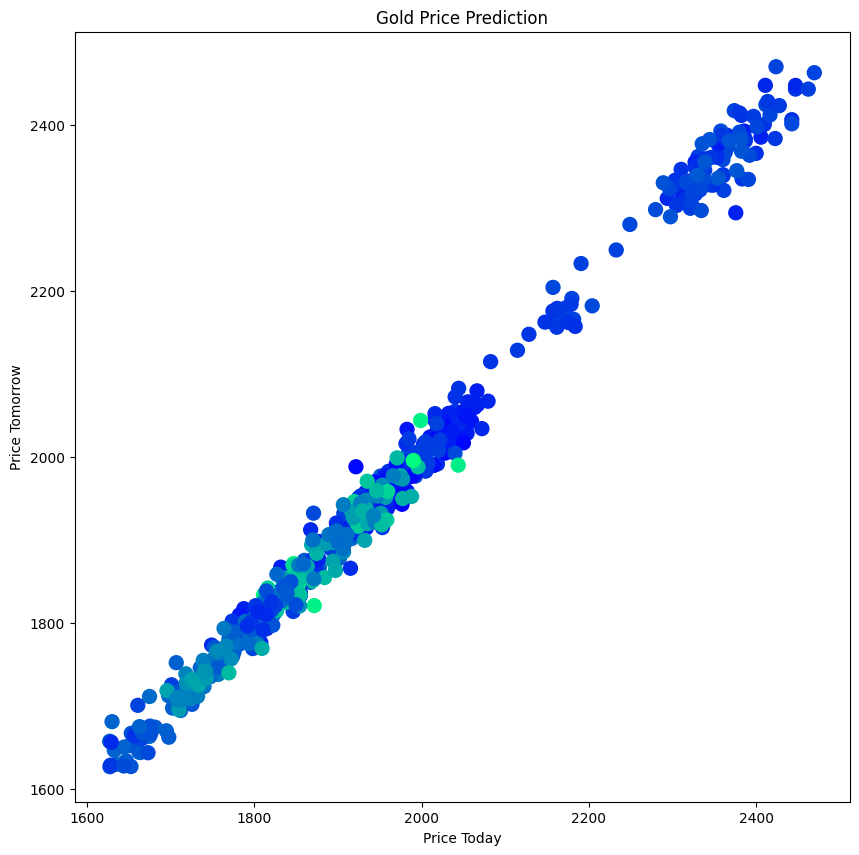

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(a["Price Today"],a["Price Tomorrow"],c=a["Crude"],cmap='winter',s=100)
plt.title("Gold Price Prediction")
plt.xlabel("Price Today")
plt.ylabel("Price Tomorrow")
plt.show()

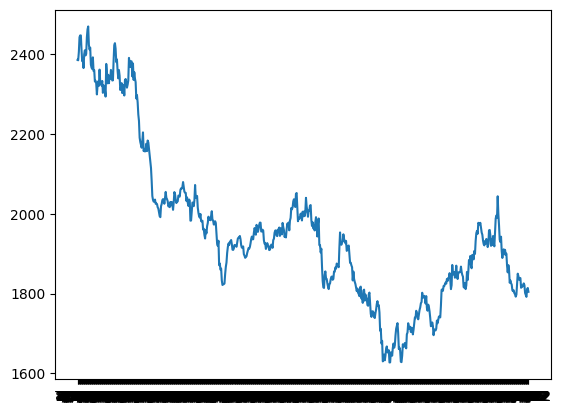

In [ ]:
plt.plot(a['Date'].values,a['Price Today'].values)

In [ ]:
a

,Date,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,...,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude,Rolling Mean,Rolling Std,Price Change
0,8/7/24,2405.87,2384.90,2385.83,2392.20,6.37,8.944414,30.155078,2414.7450,2368.2948,...,5.50,4.00,3.96,103.37,5293.13,24.77,72.84,NaN,NaN,0.93
1,8/6/24,2442.74,2405.87,2384.90,2385.83,0.93,8.944414,29.423936,2414.1525,2367.7916,...,5.50,3.99,3.90,102.78,5206.42,33.71,73.86,NaN,NaN,-20.97
2,8/5/24,2447.17,2442.74,2405.87,2384.90,-20.97,8.944414,28.341301,2413.2305,2367.1584,...,5.52,3.89,3.78,103.22,5151.14,23.39,74.21,NaN,NaN,-36.87
3,8/2/24,2447.23,2447.17,2442.74,2405.87,-36.87,8.944414,28.616661,2411.0920,2365.7250,...,5.54,3.88,3.80,104.31,5376.63,20.52,76.87,NaN,NaN,-4.43
4,8/1/24,2411.09,2447.23,2447.17,2442.74,-4.43,8.944414,26.084796,2408.5670,2363.5624,...,5.55,4.16,3.99,104.07,5537.84,16.20,78.59,NaN,NaN,-0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,1/7/22,1810.28,1791.61,1796.41,1801.52,5.11,38.170000,20.995813,450.8225,180.3290,...,0.05,0.87,1.76,96.26,4697.66,19.85,79.62,1848.46775,44.185773,4.80
672,1/6/22,1813.88,1810.28,1791.61,1796.41,4.80,47.400000,20.995813,361.0020,144.4008,...,0.04,0.88,1.73,96.20,4693.39,20.29,77.24,1844.88400,42.781821,-18.67
673,1/5/22,1804.27,1813.88,1810.28,1791.61,-18.67,28.300000,20.995813,271.4215,108.5686,...,0.05,0.83,1.71,96.31,4787.99,17.07,77.18,1841.91200,40.863363,-3.60
674,1/4/22,1815.73,1804.27,1813.88,1810.28,-3.60,0.450000,20.995813,180.9075,72.3630,...,0.06,0.77,1.66,96.19,4804.51,16.57,76.02,1838.69825,37.686820,9.61


# Train The Data

In [ ]:
f = [
    'Price 2 Days Prior', 'Price 1 Day Prior', 'Price Today',
    'Twenty Moving Average', 'Fifty Day Moving Average', '200 Day Moving Average',
    'Monthly Inflation Rate', 'EFFR Rate', 'Treasury Par Yield Month',
    'Treasury Par Yield Two Year', 'Treasury Par Yield Curve Rates (10 Yr)',
    'DXY', 'SP Open', 'VIX', 'Crude'
]
x = a[f]

y = a['Price Tomorrow']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

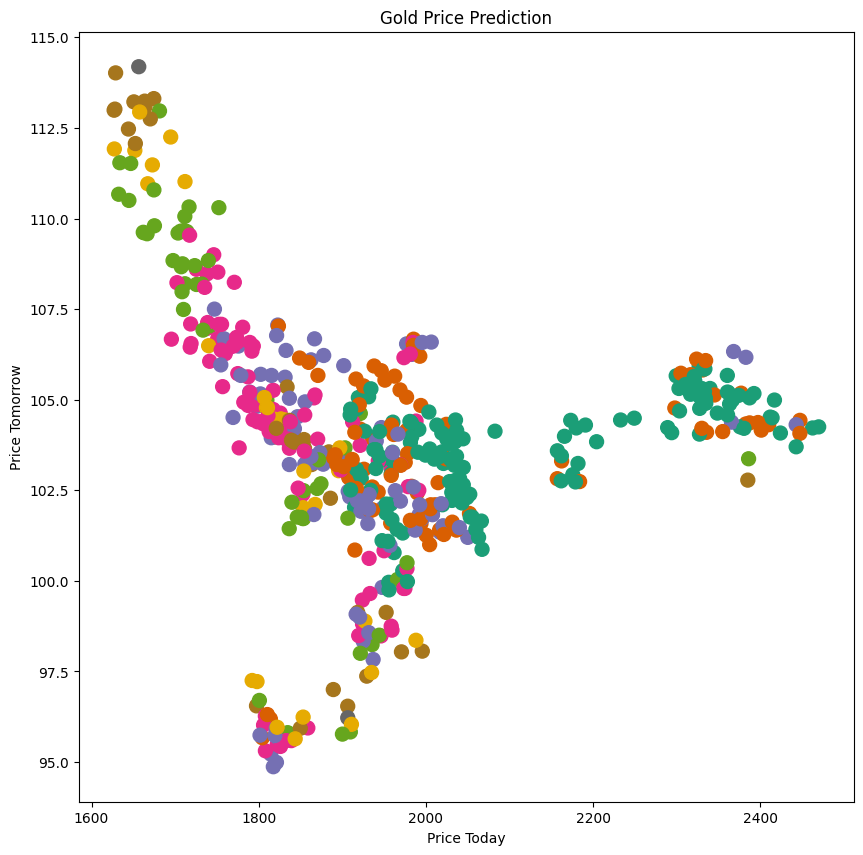

In [ ]:
plt.figure(figsize=(10,10))

plt.scatter(x_train['Price Today'],x_train['DXY'],c=x_train['VIX'],cmap='Dark2',s=100)
plt.title("Gold Price Prediction")
plt.xlabel("Price Today")
plt.ylabel("Price Tomorrow")
plt.show()

In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Date                                    676 non-null    object 
 1   Price 2 Days Prior                      676 non-null    float64
 2   Price 1 Day Prior                       676 non-null    float64
 3   Price Today                             676 non-null    float64
 4   Price Tomorrow                          676 non-null    float64
 5   Price Change Tomorrow                   676 non-null    float64
 6   Price Change Ten                        676 non-null    float64
 7   Std Dev 10                              676 non-null    float64
 8   Twenty Moving Average                   676 non-null    float64
 9   Fifty Day Moving Average                676 non-null    float64
 10  200 Day Moving Average                  676 non-null    float6

# Scaler

In [ ]:
S = StandardScaler()
x_train = S.fit_transform(x_train)
x_test = S.transform(x_test)

# Predict using Linear Regression

In [ ]:
l = LinearRegression()
l.fit(x_train,y_train)
y_pred1 = l.predict(x_test)

print(f"Mean Absolute Error: {mean_absolute_error(y_test,y_pred1)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred1)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred1))}")
print(f"R2 Score: {r2_score(y_test,y_pred1)}")


Mean Absolute Error: 14.671260662666972
Mean Squared Error: 373.47071969347553
Root Mean Squared Error: 19.32539054439717
R2 Score: 0.9914075112742037


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
r = RandomForestRegressor(n_estimators=100,random_state=42)
r.fit(x_train,y_train)
y_pred2 = r.predict(x_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred2)}')
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred2)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred2))}')
print(f'R2 Score: {r2_score(y_test,y_pred2)}')

Mean Absolute Error: 16.267983088235283
Mean Squared Error: 459.97801864169503
Root Mean Squared Error: 21.44709814034745
R2 Score: 0.9894172267573298


# XGBOOST

In [ ]:
import xgboost as xgb
xg = xgb.XGBRegressor(n_estimators=100,random_state=42)
xg.fit(x_train,y_train)
y_pred3 = xg.predict(x_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred3)}')
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred3)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred3))}')
print(f'R2 Score: {r2_score(y_test,y_pred3)}')

Mean Absolute Error: 16.266329632927384
Mean Squared Error: 469.6888457015695
Root Mean Squared Error: 21.672305961793025
R2 Score: 0.9891938085142649


# ***Decisition Tree***

Mean Absolute Error: 47.50837872541834
Mean Squared Error: 3221.9757858381577
Root Mean Squared Error: 56.76245049183622
R2 Score: 0.9258715900477412


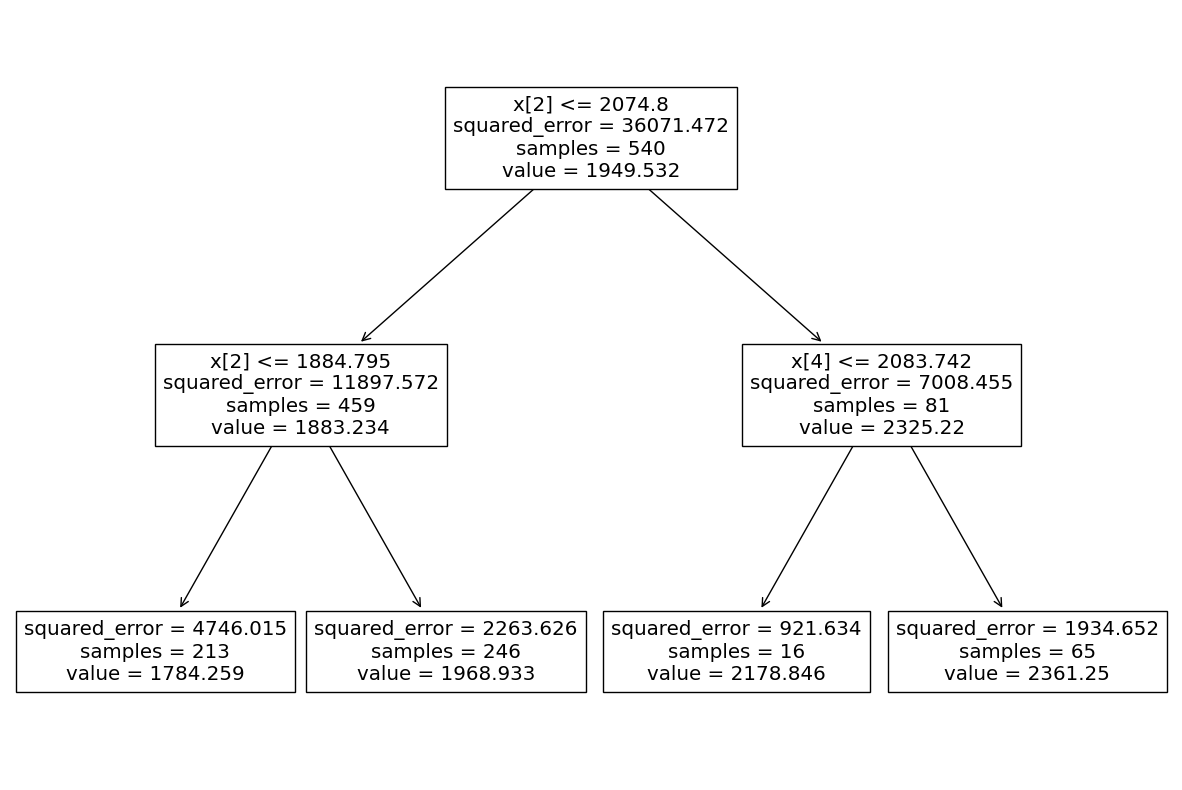

In [ ]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
d = DecisionTreeRegressor(random_state=42,max_depth=2)
d.fit(x_train,y_train)
y_pred4 = d.predict(x_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test,y_pred4)}')
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred4)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred4))}')
print(f'R2 Score: {r2_score(y_test,y_pred4)}')
plt.figure(figsize=(15,10))
plot_tree(d)
plt.show()